1. Principal Component Analysis is unsupervised dimensionality reduction technique.
2. Linear descriminant Analysis is as a supervised dimensionality reduction technique.

#### The inner working of the LDA
1. Standardize the d-dimensional dataset (d is the number of features).
2. For each class, compute the d-dimensional mean vector.
3. Construct the between class scatter-matrix, S<sub>B</sub>, and the within class matrix, S<sub>w</sub> .
4. Compute the eigenvectors and corresponding eigenvalues of the matrix, S{<sup>-1</sup><sub>w</sub>}S<sub>B</sub>.
5. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
6. Choose the k eigen vectors that corresponds to the k largest eigenvalues to construct a dxk dimensional transformation matrix, W; the eigenvectors are the columns of this matrix.
7. Project the examples on to the new feature subspace using the transformation matrix, W.





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Wine_dataset.csv")
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
y,X = df.iloc[:,0],df.iloc[:,1:]

In [4]:
X.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [6]:
np.unique(y)

array([1, 2, 3])

In [7]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)

In [8]:
X_train_std.shape

(123, 13)

In [9]:
# Computing the scatter metrices.
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f'MV {label}:{mean_vecs[label - 1]}\n')

MV 1:[ 0.9563 -0.3581  0.3239 -0.7331  0.3998  0.8919  1.0292 -0.5187  0.5063
  0.2348  0.4989  0.7458  1.2222]

MV 2:[-0.8901 -0.346  -0.5112  0.214  -0.3082 -0.0644  0.0226 -0.0536  0.1373
 -0.8707  0.4444  0.2998 -0.7028]

MV 3:[ 0.1578  0.92    0.3556  0.554  -0.0262 -0.9565 -1.2434  0.6875 -0.7934
  0.9786 -1.2274 -1.3095 -0.4251]



In [10]:
d = 13 # number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print('With in class Scatter matrix :'f"{S_W.shape[0]}x{S_W.shape[1]}")


With in class Scatter matrix :13x13


In [11]:
S_W

array([[ 46.751 ,   0.842 ,   4.5103,   3.2555,   4.7821,   7.7252,
          7.9127,  -7.3758,   8.0729,  16.6941,   0.4781,   4.2416,
          5.902 ],
       [  0.842 ,  83.2294,   5.9811,  14.1481,  -3.5158,  -3.3138,
          0.824 ,   9.0153,  -1.3767, -16.7844, -16.8482,   1.2978,
         -6.7995],
       [  4.5103,   5.9811, 101.7014,  66.8824,  14.9552,  14.5257,
         11.2129,  23.9506,   5.9773,  -1.4283,   8.4904,   6.0176,
          0.1249],
       [  3.2555,  14.1481,  66.8824,  88.8235,  11.227 ,  12.0058,
          7.0824,  13.5887,   2.2402,  -3.4278,  -0.1516,   9.9143,
         -4.5726],
       [  4.7821,  -3.5158,  14.9552,  11.227 , 111.9263,   5.527 ,
          1.2649, -25.0904,  28.2448,   3.4773,   4.7902,  -5.0105,
         13.6756],
       [  7.7252,  -3.3138,  14.5257,  12.0058,   5.527 ,  59.8652,
         28.9289,  -9.2706,  31.8521,  14.9847,   3.2337,  17.2698,
          3.5887],
       [  7.9127,   0.824 ,  11.2129,   7.0824,   1.2649,  28.9289,
  

In [12]:
print("class_ label distribution :", np.bincount(y_train)[1:])

class_ label distribution : [40 49 34]


In [13]:
# Computing the Scaled Scatter metrices
d = 13
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: 'f"{S_W.shape[0]}x{S_W.shape[1]}")

Scaled within-class scatter matrix: 13x13


In [14]:
S_W

array([[ 1.1617, -0.0142,  0.1291,  0.065 ,  0.1228,  0.2117,  0.1962,
        -0.18  ,  0.2554,  0.4471,  0.0095,  0.109 ,  0.1541],
       [-0.0142,  2.0475,  0.1259,  0.3119, -0.0902, -0.1305, -0.0152,
         0.1877, -0.1336, -0.4702, -0.3488,  0.007 , -0.1517],
       [ 0.1291,  0.1259,  2.4305,  1.5984,  0.3983,  0.3742,  0.2478,
         0.5582,  0.1476, -0.038 ,  0.2352,  0.148 , -0.0117],
       [ 0.065 ,  0.3119,  1.5984,  2.1236,  0.3278,  0.3058,  0.1526,
         0.3066,  0.0767, -0.074 ,  0.0099,  0.2051, -0.1201],
       [ 0.1228, -0.0902,  0.3983,  0.3278,  2.577 ,  0.1312,  0.0641,
        -0.5975,  0.6016,  0.0981,  0.1058, -0.1196,  0.2703],
       [ 0.2117, -0.1305,  0.3742,  0.3058,  0.1312,  1.4102,  0.6493,
        -0.1379,  0.7892,  0.4226,  0.0621,  0.3816,  0.0943],
       [ 0.1962, -0.0152,  0.2478,  0.1526,  0.0641,  0.6493,  0.6478,
        -0.3305,  0.6013,  0.3588,  0.0139,  0.1619,  0.0215],
       [-0.18  ,  0.1877,  0.5582,  0.3066, -0.5975, -0.1379, 

In [15]:
# Computing the Between Class Scatter matrix
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d,1)
mean_overall

array([[-5.0863e-16],
       [-3.0689e-16],
       [-1.7461e-15],
       [-2.7169e-16],
       [-3.0576e-16],
       [ 4.5312e-16],
       [ 2.7417e-16],
       [ 1.3088e-16],
       [-4.6959e-16],
       [ 4.6936e-16],
       [ 3.0689e-16],
       [-7.7445e-16],
       [ 7.7625e-17]])

In [16]:
d = 13 # number of features
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1) # make column vector
    S_B += n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)

print("Between Class Scatter matrix: "f"{S_B.shape[0]}x{S_B.shape[1]}")


Between Class Scatter matrix: 13x13


The remaining  step of the LDA are similar to the steps of the PCA. However, instead of performing eigen decomposition on the covarience matrix, we solve the generalized eigenvalue problem of the matrix, $ S_W^{-1}S_B $

In [17]:
# Selecting linear discriminants for the new feature subspace
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W.dot(S_B)))

In [18]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_vecs = sorted(eigen_pairs, key=lambda k:k[0], reverse=True)
print('EigenValues in descending order: \n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

EigenValues in descending order: 

156951375960028.7
53242383354302.84
53242383354302.84
51430948407882.555
51430948407882.555
22313155928264.62
20633864085058.0
20633864085058.0
0.010942563450014188
26011678050236.055
26011678050236.055
24556841735513.914
0.0111083984375


 In LDA, the number of linear discriminant is at most c-1 where c is the number of class labels.
 TO measure how much of the class-discriminatory information is captured by the linear discriminants(eigenvectors), let's plot the linear discriminants by decreasing eigenvalues, for simplicity we will call the content of class-descriminatory information descriminability:

In [19]:
tot = sum(eigen_vals.real)

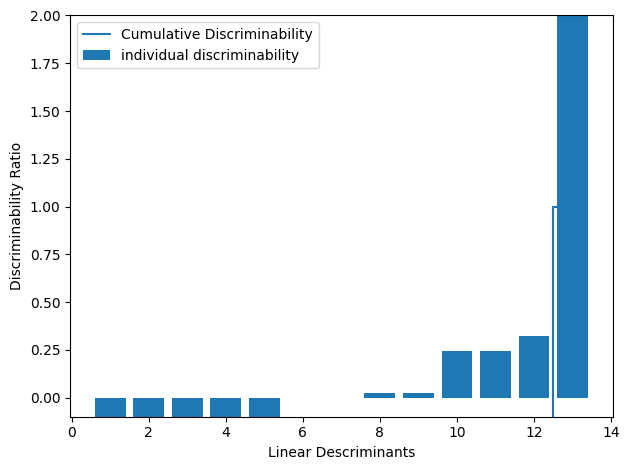

In [20]:
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, align='center', label="individual discriminability")
plt.step(range(1,14),cum_discr, where='mid',label='Cumulative Discriminability')
plt.ylabel('Discriminability Ratio')
plt.xlabel('Linear Descriminants')
plt.ylim([-0.1, 2])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
# let's now stack the most descriminative eigenvector columns to create the transformation matrix, W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix w: \n', w)

Matrix w: 
 [[ 0.2126  0.1176]
 [-0.3474 -0.4363]
 [ 0.467   0.2855]
 [ 0.0118 -0.1513]
 [ 0.1045 -0.5987]
 [-0.1538 -0.1975]
 [-0.443  -0.1931]
 [ 0.0937 -0.054 ]
 [ 0.4842  0.1185]
 [ 0.0456  0.1477]
 [ 0.1199  0.0726]
 [ 0.2134  0.0093]
 [-0.2825 -0.0193]]


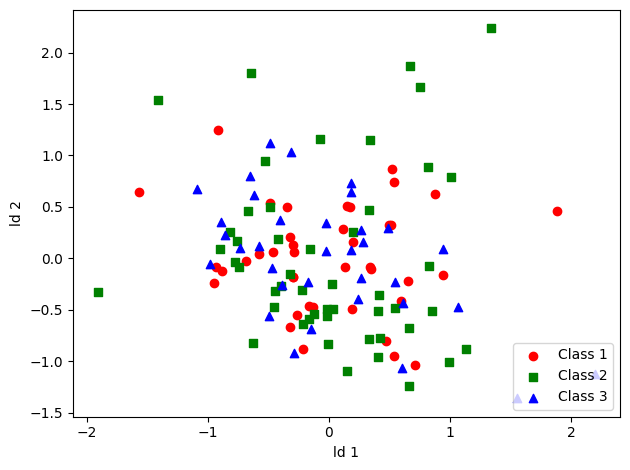

In [22]:
# Projecting examples onto the new feature space.
# X' = XW\
X_train_lda = X_train_std.dot(w)
colors = ['r','g','b']
markers = ['o', 's','^']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
                X_train_lda[y_train==l, 1]*(-1),
                c=c, label=f"Class {l}", marker=m)
    
plt.xlabel('ld 1')
plt.ylabel('ld 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()